In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("./dataset/DM1_game_dataset.csv")
df_to_be_modified = pd.read_csv("./dataset/DM1_game_dataset.csv")

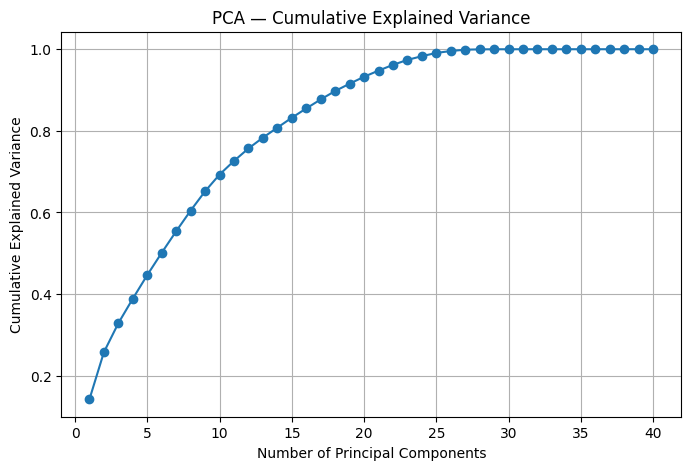

PC1: 14.23% variance (14.23% cumulative)
PC2: 11.53% variance (25.76% cumulative)
PC3: 7.11% variance (32.87% cumulative)
PC4: 6.01% variance (38.88% cumulative)
PC5: 5.78% variance (44.66% cumulative)
PC6: 5.46% variance (50.12% cumulative)
PC7: 5.27% variance (55.39% cumulative)
PC8: 5.06% variance (60.45% cumulative)
PC9: 4.73% variance (65.19% cumulative)
PC10: 4.10% variance (69.28% cumulative)
PC11: 3.34% variance (72.63% cumulative)
PC12: 3.05% variance (75.68% cumulative)
PC13: 2.65% variance (78.33% cumulative)
PC14: 2.45% variance (80.78% cumulative)
PC15: 2.43% variance (83.20% cumulative)
PC16: 2.28% variance (85.49% cumulative)
PC17: 2.20% variance (87.69% cumulative)
PC18: 2.07% variance (89.76% cumulative)
PC19: 1.78% variance (91.54% cumulative)
PC20: 1.71% variance (93.25% cumulative)
PC21: 1.50% variance (94.75% cumulative)
PC22: 1.41% variance (96.17% cumulative)
PC23: 1.22% variance (97.39% cumulative)
PC24: 0.91% variance (98.29% cumulative)
PC25: 0.80% variance (9

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Select only numeric columns
df_num = df.select_dtypes(include=['float64', 'int64']).dropna()

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

#Explained variance ratio (each component)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

#Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA — Cumulative Explained Variance')
plt.grid(True)
plt.show()

#Print results
for i, (ev, cv) in enumerate(zip(explained_var, cumulative_var), start=1):
    print(f"PC{i}: {ev*100:.2f}% variance ({cv*100:.2f}% cumulative)")

#Find number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\n {n_components_95} components explain 95% of the total variance.")


## 1. Deleting the numcomments

In [37]:
df_to_be_modified = df_to_be_modified.drop(labels = "NumComments", axis = 1)

## 2. Understanding commaxplaytime and mfgplaytime

In [38]:
df_to_be_modified[df_to_be_modified["MfgPlaytime"] == df_to_be_modified["ComMaxPlaytime"]]["BGGId"].count()

np.int64(21925)

In [39]:
df_to_be_modified["ComMaxPlaytime"].sort_values(ascending = False)[0:10]

4349     60000
19044    22500
1713     17280
15642    14400
8120     12000
18374    12000
8052     10000
2059      8640
14258     7920
3497      6000
Name: ComMaxPlaytime, dtype: int64

In [40]:
df_to_be_modified["ComMaxPlaytime"].mean()

np.float64(90.51352337514253)

In [41]:
df_to_be_modified["ComMaxPlaytime"].median()

np.float64(45.0)

In [42]:
# Decided to drop ComMaxPlaytime due to high number of missing values and inconsistencies with MfgPlaytime
df_to_be_modified = df_to_be_modified.drop(labels = "ComMaxPlaytime", axis = 1)
df_to_be_modified = df_to_be_modified.drop(labels = "ComMinPlaytime", axis = 1) # dropping also ComMinPlaytime due to high correlation with MfgPlaytime (0.85)

In [43]:
# Replacing 0 values in MfgPlaytime with the median MfgPlaytime of the dataset
df_to_be_modified["MfgPlaytime"].replace(0, df_to_be_modified["MfgPlaytime"].median(), inplace=True)
((df_to_be_modified["MfgPlaytime"]==0).sum()) # check how many have MfgPlaytime 0

C:\Users\leona\AppData\Local\Temp\ipykernel_6332\1361840738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_to_be_modified["MfgPlaytime"].replace(0, df_to_be_modified["MfgPlaytime"].median(), inplace=True)


np.int64(0)

## 3. Correction of IsReimplementation 

In [44]:
# Fixing IsReimplementation based on NumImplementations
df_to_be_modified.loc[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0), "IsReimplementation"] = 1

In [45]:
df_to_be_modified[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0)]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating


## 4. Deleting Comweight because it's Gameweight + random noise

In [46]:
# weighted comweight
df_to_be_modified = df_to_be_modified.drop(labels = "ComWeight", axis = 1)

## 5. Deleting BestPlayers due to the high number of missing values (90%)

In [47]:
df_to_be_modified = df_to_be_modified.drop(labels = "BestPlayers", axis = 1)

## 6. adding noCategory column 

In [48]:
# adding no category column
categories = ["Cat:Thematic", "Cat:Strategy", "Cat:War", "Cat:Family", "Cat:CGS", "Cat:Abstract", "Cat:Party", "Cat:Childrens"]
df_to_be_modified["Cat:NoCategory"] = (df_to_be_modified[categories].sum(axis=1) == 0).astype(int)
df_to_be_modified["Cat:NoCategory"].value_counts()

Cat:NoCategory
1    11184
0    10741
Name: count, dtype: int64

## 7. Replacing GameWeight missing values (<1)

In [49]:
# grouping gameweight values by category
# replacing 0 values in GameWeight with the mean GameWeight of the respective category
((df_to_be_modified["GameWeight"]==0) & df_to_be_modified["Cat:NoCategory"]==1).sum() # check how many have no category and gameweight 0
# replacing with general median
median_gameweight = df_to_be_modified[df_to_be_modified["GameWeight"] != 0]["GameWeight"].median()
df_to_be_modified.loc[df_to_be_modified["GameWeight"]==0, "GameWeight"] = median_gameweight

## 8. Replacing MinPlayers values == 0

In [50]:
# replacing 0 values in MinPlayers (50) with the median MinPlayers of the dataset
df_to_be_modified["MinPlayers"].replace(0, df_to_be_modified["MinPlayers"].median(), inplace=True)
((df_to_be_modified["MinPlayers"]==0).sum()) # check how many have MinPlayers 0

C:\Users\leona\AppData\Local\Temp\ipykernel_6332\3579706909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_to_be_modified["MinPlayers"].replace(0, df_to_be_modified["MinPlayers"].median(), inplace=True)


np.int64(0)

## 9. Removing GoodPlayers column

In [51]:
# removing GoodPlayers column
df_to_be_modified = df_to_be_modified.drop(labels = "GoodPlayers", axis = 1)

## 10. Handle NumWant - NumWish - NumUserRatings - NumOwned correlation

In [52]:
# NumUserRatings vs NumOwned -> high correlation (0.99)
# remove NumOwned since it is redundant. NumUserRatings contains both popularity and engagement information and doesn't contain 0 values.
df_to_be_modified = df_to_be_modified.drop(labels = "NumOwned", axis = 1) # representative of concterete user engagement

# NumWant vs NumWish -> high correlation (0.94)
# remove NumWant since it is redundant. NumWish represents a concrete desire -> wishlist.
df_to_be_modified = df_to_be_modified.drop(labels = "NumWant", axis = 1) # representative of potential user engagement

# Despite the high correlation between NumUserRatings and NumWish (0.81), both features will be kept as they represent different aspects of user engagement.


## 11. Binarization of Family attribute

In [53]:
# transform Family into binary
df_to_be_modified["HasFamily"] = df_to_be_modified["Family"].notnull().astype(int)
df_to_be_modified["HasFamily"]
df_to_be_modified["HasFamily"].value_counts()
df_to_be_modified = df_to_be_modified.drop(labels = "Family", axis = 1)

## 12. Removing image Path 

In [54]:
# removing ImagePath column
df_to_be_modified = df_to_be_modified.drop(labels = "ImagePath", axis = 1)

# 13. creating Players column from MinPlayers and MaxPlayers

In [55]:
# creating Players column by taking the average of MinPlayers and MaxPlayers
df_to_be_modified["Players"] = (df_to_be_modified["MinPlayers"] + df_to_be_modified["MaxPlayers"]) / 2
df_to_be_modified = df_to_be_modified.drop(labels = ["MinPlayers", "MaxPlayers"], axis = 1)

## 14. Deleting LanguageEase column

In [56]:
# deleting LanguageEase column due to the high number (25%) of Nan values and not precise range of values (ratio-scaled feature instead of ordinal one)
df_to_be_modified = df_to_be_modified.drop(labels = "LanguageEase", axis = 1)

## 15. Deleting ComAgeRec

In [57]:
# due to the high correlation (0.72) between ComAgeRec and MfgAgeRec and the high presence of 0, we decided to drop ComAgeRec
df_to_be_modified = df_to_be_modified.drop(labels = "ComAgeRec", axis = 1)
# replacing 0 values in MfgAgeRec with the median MfgAgeRec of the dataset
df_to_be_modified["MfgAgeRec"].replace(0, df_to_be_modified["MfgAgeRec"].median(), inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_6332\986681141.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_to_be_modified["MfgAgeRec"].replace(0, df_to_be_modified["MfgAgeRec"].median(), inplace=True)


## 16. Deleting NumWeightVotes

In [58]:
# since Comwight was removed and NumUserRatings represents a better measure of user engagement, we decided to drop NumWeightVotes
df_to_be_modified = df_to_be_modified.drop(labels = "NumWeightVotes", axis = 1)

## 17. Replacing ranking 21926 with 0

In [59]:
# replacing ranking 21926 with 0 in column beginning with "Rank:"

rank_cols = [col for col in df_to_be_modified.columns if col.startswith("Rank:")]
for col in rank_cols:
    df_to_be_modified.loc[df_to_be_modified[col] == 21926, col] = 0
    

In [60]:
print(df_to_be_modified.columns)
print(df_to_be_modified.shape)

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'NumWish', 'MfgPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rank:strategygames',
       'Rank:abstracts', 'Rank:familygames', 'Rank:thematic', 'Rank:cgs',
       'Rank:wargames', 'Rank:partygames', 'Rank:childrensgames',
       'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS',
       'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Rating',
       'Cat:NoCategory', 'HasFamily', 'Players'],
      dtype='object')
(21925, 34)


In [61]:
# number of zeros of each column
for col in df_to_be_modified.columns:
    num_zeros = (df_to_be_modified[col] == 0).sum()
    print(f"Column '{col}' has {num_zeros} zeros.")

Column 'BGGId' has 0 zeros.
Column 'Name' has 0 zeros.
Column 'Description' has 0 zeros.
Column 'YearPublished' has 193 zeros.
Column 'GameWeight' has 0 zeros.
Column 'NumWish' has 106 zeros.
Column 'MfgPlaytime' has 0 zeros.
Column 'MfgAgeRec' has 0 zeros.
Column 'NumUserRatings' has 0 zeros.
Column 'NumAlternates' has 12967 zeros.
Column 'NumExpansions' has 16337 zeros.
Column 'NumImplementations' has 17052 zeros.
Column 'IsReimplementation' has 17052 zeros.
Column 'Kickstarted' has 18563 zeros.
Column 'Rank:strategygames' has 19606 zeros.
Column 'Rank:abstracts' has 20810 zeros.
Column 'Rank:familygames' has 19609 zeros.
Column 'Rank:thematic' has 20701 zeros.
Column 'Rank:cgs' has 21622 zeros.
Column 'Rank:wargames' has 18395 zeros.
Column 'Rank:partygames' has 21285 zeros.
Column 'Rank:childrensgames' has 21044 zeros.
Column 'Cat:Thematic' has 20701 zeros.
Column 'Cat:Strategy' has 19606 zeros.
Column 'Cat:War' has 18395 zeros.
Column 'Cat:Family' has 19609 zeros.
Column 'Cat:CGS'

In [62]:
# null values in each column
for col in df_to_be_modified.columns:
    num_nulls = df_to_be_modified[col].isnull().sum()
    print(f"Column '{col}' has {num_nulls} null values.")

Column 'BGGId' has 0 null values.
Column 'Name' has 0 null values.
Column 'Description' has 1 null values.
Column 'YearPublished' has 0 null values.
Column 'GameWeight' has 0 null values.
Column 'NumWish' has 0 null values.
Column 'MfgPlaytime' has 0 null values.
Column 'MfgAgeRec' has 0 null values.
Column 'NumUserRatings' has 0 null values.
Column 'NumAlternates' has 0 null values.
Column 'NumExpansions' has 0 null values.
Column 'NumImplementations' has 0 null values.
Column 'IsReimplementation' has 0 null values.
Column 'Kickstarted' has 0 null values.
Column 'Rank:strategygames' has 0 null values.
Column 'Rank:abstracts' has 0 null values.
Column 'Rank:familygames' has 0 null values.
Column 'Rank:thematic' has 0 null values.
Column 'Rank:cgs' has 0 null values.
Column 'Rank:wargames' has 0 null values.
Column 'Rank:partygames' has 0 null values.
Column 'Rank:childrensgames' has 0 null values.
Column 'Cat:Thematic' has 0 null values.
Column 'Cat:Strategy' has 0 null values.
Column 

In [63]:
# number of outliers in each numeric and not binary column using IQR
numeric_cols = df_to_be_modified.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if df_to_be_modified[col].nunique() > 2]  # exclude binary columns
for col in numeric_cols:
    Q1 = df_to_be_modified[col].quantile(0.25)
    Q3 = df_to_be_modified[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_to_be_modified[(df_to_be_modified[col] < lower_bound) | (df_to_be_modified[col] > upper_bound)]
    print(f"Column '{col}' has {outliers.shape[0]} outliers.")


Column 'BGGId' has 0 outliers.
Column 'YearPublished' has 1143 outliers.
Column 'GameWeight' has 154 outliers.
Column 'NumWish' has 3030 outliers.
Column 'MfgPlaytime' has 1463 outliers.
Column 'MfgAgeRec' has 14 outliers.
Column 'NumUserRatings' has 3110 outliers.
Column 'NumAlternates' has 3477 outliers.
Column 'NumExpansions' has 2183 outliers.
Column 'NumImplementations' has 4873 outliers.
Column 'Rank:strategygames' has 2319 outliers.
Column 'Rank:abstracts' has 1115 outliers.
Column 'Rank:familygames' has 2316 outliers.
Column 'Rank:thematic' has 1224 outliers.
Column 'Rank:cgs' has 303 outliers.
Column 'Rank:wargames' has 3530 outliers.
Column 'Rank:partygames' has 640 outliers.
Column 'Rank:childrensgames' has 881 outliers.
Column 'Players' has 952 outliers.


In [64]:
# exporting cleaned dataset
df_to_be_modified.to_csv("./dataset/DM1_game_dataset_cleaned.csv", index=False)